# Baseline Model
## Linear Regression

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Train/Test Split
from sklearn.model_selection import train_test_split
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
# Linear regression model
from sklearn.linear_model import LinearRegression
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [77]:
df = pd.read_csv("baseballsalaries_1985.csv")

In [78]:
df.sample(5)

,playerID,name_common,BirthYear,birthCountry,debut_year,finalGame_year,age,weight,height,bats,throws,POS,Year,stint_ID,GamesPlayer,PA,AB_p,qualified,R_p,H_p,1B,2B_p,3B_p,HR_p,RBI,SB_p,CS_p,BB_p,SO_p,IBB,HBP_p,SH,SF_p,GIDP,BA,OBP,SLG,OPS,BABIP,TB,Inn,OPS_plus,WAR,WAR_def,WAR_off,career_G_x,career_PA,CareerAB,career_R_x,Career_H,career_1B,Career_2B,Career_3B,Career_HR,career_RBI,Career_SB,Career_CS,Career_BB,Career_SO,Career_IBB,career_HBP_x,career_SH,Career_SF,career_GIDP,career_TB,career_WAR,career_BA,career_OBP,career_SLG,career_OPS,career_BABIP,teamName,attendance,lgID,divID,Rank,G,W,L,W%,DivWin,LgWin,WSWin,Salary,averagesalary,leagueminimum,adjusted_salary
15859,zobribe01,Ben Zobrist,1981.0,USA,2006,2019,31.0,210.0,75.0,B,R,2B,2012.0,1,157.0,668.0,560.0,1,88.0,151.0,85.0,39.0,7.0,20.0,74.0,14.0,9.0,97.0,103.0,7.0,3.0,2.0,6.0,13.0,0.270,0.377,0.471,0.848,0.296,264.0,1377.6,137.100827,5.78,0.56,5.40,761,3126,2668,405,693,416,159,26,92,388,81,27,395,526,15,13,16,34,46,1180,25.79,0.260,0.354,0.442,0.796,0.288,Tampa Bay Rays,1559681.0,AL,E,3.0,162.0,90.0,72.0,0.556,N,N,N,4687300.0,3213479.0,480000.0,6327855.0
6460,mearepa01,Pat Meares,1968.0,USA,1993,2001,27.0,185.0,72.0,R,R,SS,1996.0,1,152.0,554.0,517.0,1,66.0,138.0,97.0,26.0,7.0,8.0,67.0,9.0,4.0,17.0,90.0,1.0,9.0,4.0,7.0,19.0,0.267,0.298,0.391,0.689,0.305,202.0,1250.3,72.211101,0.51,1.10,0.31,459,1594,1482,185,391,283,71,15,22,173,28,14,53,260,1,23,18,18,50,558,3.60,0.264,0.296,0.377,0.673,0.303,Minnesota Twins,1437352.0,AL,C,4.0,162.0,78.0,84.0,0.481,N,N,N,275000.0,1119981.0,122667.0,544500.0
16771,phegljo01,Josh Phegley,1988.0,USA,2013,2020,25.0,225.0,70.0,R,R,C,2013.0,1,65.0,213.0,204.0,0,14.0,42.0,31.0,7.0,0.0,4.0,22.0,2.0,0.0,5.0,41.0,0.0,0.0,2.0,2.0,6.0,0.206,0.223,0.299,0.522,0.236,61.0,516.7,40.779381,-0.45,0.73,-0.72,65,213,204,14,42,31,7,0,4,22,2,0,5,41,0,0,2,2,6,61,-0.45,0.206,0.223,0.299,0.522,0.236,Chicago White Sox,1768413.0,AL,C,5.0,162.0,63.0,99.0,0.389,N,N,N,490000.0,3386212.0,490000.0,646800.0
15842,mccutan01,Andrew McCutchen,1986.0,USA,2009,2023,25.0,195.0,71.0,R,R,OF,2012.0,1,157.0,673.0,593.0,1,107.0,194.0,128.0,29.0,6.0,31.0,96.0,20.0,12.0,70.0,132.0,13.0,5.0,0.0,5.0,9.0,0.327,0.400,0.553,0.953,0.375,328.0,1364.0,161.687879,6.94,-0.20,7.45,577,2497,2168,362,629,398,124,25,82,295,98,37,283,430,19,21,3,22,25,1049,18.46,0.290,0.374,0.484,0.858,0.326,Pittsburgh Pirates,2091918.0,NL,C,4.0,162.0,79.0,83.0,0.488,N,N,N,708333.0,3213479.0,480000.0,956250.0
20887,cuthbch01,Cheslor Cuthbert,1992.0,Nicaragua,2015,2020,27.0,205.0,73.0,R,R,3B,2020.0,1,1.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.0,-100.000000,-0.03,0.00,-0.03,323,1161,1077,100,269,187,53,2,27,119,3,1,75,234,1,4,1,4,35,407,-1.34,0.250,0.300,0.378,0.678,0.295,Chicago White Sox,0.0,AL,C,2.0,60.0,35.0,25.0,0.583,N,N,N,563500.0,4724815.0,563500.0,664930.0


In [79]:
# Drop name_common
df = df.drop(columns=['name_common'])

# drop playerID
df = df.drop(columns=['playerID'])

In [80]:
# Convert to binary
cols = ['DivWin', 'LgWin', 'WSWin']
for col in cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Y' else 0)

In [81]:
pd.set_option('display.max_columns', None)
df.sample(5)

,BirthYear,birthCountry,debut_year,finalGame_year,age,weight,height,bats,throws,POS,Year,stint_ID,GamesPlayer,PA,AB_p,qualified,R_p,H_p,1B,2B_p,3B_p,HR_p,RBI,SB_p,CS_p,BB_p,SO_p,IBB,HBP_p,SH,SF_p,GIDP,BA,OBP,SLG,OPS,BABIP,TB,Inn,OPS_plus,WAR,WAR_def,WAR_off,career_G_x,career_PA,CareerAB,career_R_x,Career_H,career_1B,Career_2B,Career_3B,Career_HR,career_RBI,Career_SB,Career_CS,Career_BB,Career_SO,Career_IBB,career_HBP_x,career_SH,Career_SF,career_GIDP,career_TB,career_WAR,career_BA,career_OBP,career_SLG,career_OPS,career_BABIP,teamName,attendance,lgID,divID,Rank,G,W,L,W%,DivWin,LgWin,WSWin,Salary,averagesalary,leagueminimum,adjusted_salary
14472,1975.0,USA,1999,2012,33.0,250.0,74.0,R,R,C,2009.0,1,125.0,460.0,429.0,0,43.0,97.0,59.0,19.0,0.0,19.0,71.0,1.0,0.0,20.0,76.0,2.0,1.0,3.0,7.0,4.0,0.226,0.258,0.403,0.661,0.229,173.0,974.3,70.780252,0.86,1.37,0.28,813,2747,2521,299,601,359,149,1,92,355,2,2,143,444,16,27,25,28,46,1028,3.46,0.238,0.284,0.408,0.692,0.253,Toronto Blue Jays,1876129.0,AL,E,4.0,162.0,75.0,87.0,0.463,0,0,0,2500000.0,2996106.0,400000.0,3625000.0
13250,1981.0,USA,2007,2015,25.0,180.0,69.0,L,L,OF,2007.0,1,14.0,9.0,6.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000,0.333,0.000,0.333,0.000,0.0,24.0,-4.428162,0.04,0.08,-0.06,14,9,6,3,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0.04,0.000,0.333,0.000,0.333,0.000,Chicago Cubs,3252462.0,NL,C,1.0,162.0,85.0,77.0,0.525,1,0,0,380000.0,2824751.0,380000.0,573800.0
8633,1974.0,USA,1997,2009,25.0,195.0,74.0,R,R,OF,2000.0,1,50.0,135.0,119.0,0,13.0,26.0,18.0,5.0,0.0,3.0,16.0,3.0,1.0,11.0,34.0,0.0,3.0,1.0,1.0,3.0,0.218,0.299,0.336,0.635,0.277,40.0,251.0,61.079214,-0.53,-0.20,-0.45,135,302,267,31,55,40,9,1,5,25,8,2,22,80,1,11,1,1,4,81,-1.21,0.206,0.292,0.303,0.595,0.273,Pittsburgh Pirates,1748908.0,NL,C,5.0,162.0,69.0,93.0,0.426,0,0,0,175000.0,1895630.0,200000.0,316750.0
4264,1966.0,USA,1991,2001,25.0,200.0,73.0,R,R,3B,1992.0,1,38.0,93.0,87.0,0,13.0,19.0,13.0,2.0,0.0,4.0,13.0,3.0,0.0,3.0,13.0,1.0,2.0,0.0,1.0,0.0,0.218,0.258,0.379,0.637,0.211,33.0,224.4,81.851762,0.27,-0.09,0.27,74,165,155,22,35,22,7,0,6,17,6,1,6,24,1,2,1,1,2,60,0.26,0.226,0.262,0.387,0.649,0.230,Oakland Athletics,2494160.0,AL,W,1.0,162.0,96.0,66.0,0.593,1,0,0,113000.0,1028667.0,109000.0,249730.0
18878,1991.0,USA,2016,2018,25.0,179.0,68.0,R,R,2B,2016.0,1,32.0,67.0,60.0,0,4.0,11.0,9.0,2.0,0.0,0.0,3.0,0.0,0.0,5.0,11.0,0.0,0.0,2.0,0.0,4.0,0.183,0.246,0.217,0.463,0.224,13.0,110.0,24.970684,-0.39,0.09,-0.48,32,67,60,4,11,9,2,0,0,3,0,0,5,11,0,0,2,0,4,13,-0.39,0.183,0.246,0.217,0.463,0.224,Cincinnati Reds,1894085.0,NL,C,5.0,162.0,68.0,94.0,0.420,0,0,0,507500.0,3966020.0,507500.0,654675.0


In [82]:
X = df.drop(columns=["adjusted_salary"])
y = df["adjusted_salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# print categorical columns
print(X_train.select_dtypes(include=['object']).columns)

Index(['birthCountry', 'bats', 'throws', 'POS', 'teamName', 'lgID', 'divID'], dtype='object')


In [84]:
# Categorical columns
category_cols = ['birthCountry', 'bats', 'throws', 'POS', 'teamName', 'lgID', 'divID']

encoder = OneHotEncoder(handle_unknown='ignore')

# Fit on categorical columns
encoder.fit(X_train[category_cols])

# Transform on training/test data
X_train_enc = encoder.transform(X_train[category_cols])
X_test_enc = encoder.transform(X_test[category_cols])

# Convert to DataFrame with column names
X_train_enc_df = pd.DataFrame(X_train_enc.toarray(), columns=encoder.get_feature_names_out(input_features=category_cols))
X_test_enc_df = pd.DataFrame(X_test_enc.toarray(), columns=encoder.get_feature_names_out(input_features=category_cols))


In [85]:
# Get numerical columns
num_cols = X_train.columns.difference(category_cols)

# concat numerical columns with encoded categorical columns
X_train_final = pd.concat([X_train[num_cols].reset_index(drop=True), X_train_enc_df], axis=1)
X_test_final = pd.concat([X_test[num_cols].reset_index(drop=True), X_test_enc_df], axis=1)



In [86]:
X_train_final.sample(5)

,1B,2B_p,3B_p,AB_p,BA,BABIP,BB_p,BirthYear,CS_p,CareerAB,Career_2B,Career_3B,Career_BB,Career_CS,Career_H,Career_HR,Career_IBB,Career_SB,Career_SF,Career_SO,DivWin,G,GIDP,GamesPlayer,HBP_p,HR_p,H_p,IBB,Inn,L,LgWin,OBP,OPS,OPS_plus,PA,RBI,R_p,Rank,SB_p,SF_p,SH,SLG,SO_p,Salary,TB,W,W%,WAR,WAR_def,WAR_off,WSWin,Year,age,attendance,averagesalary,career_1B,career_BA,career_BABIP,career_GIDP,career_G_x,career_HBP_x,career_OBP,career_OPS,career_PA,career_RBI,career_R_x,career_SH,career_SLG,career_TB,career_WAR,debut_year,finalGame_year,height,leagueminimum,qualified,stint_ID,weight,birthCountry_Aruba,birthCountry_Australia,birthCountry_Bahamas,birthCountry_Belgium,birthCountry_Belize,birthCountry_Brazil,birthCountry_CAN,birthCountry_Colombia,birthCountry_Cuba,birthCountry_Curacao,birthCountry_D.R.,birthCountry_France,birthCountry_Germany,birthCountry_Honduras,birthCountry_Italy,birthCountry_Jamaica,birthCountry_Japan,birthCountry_Mexico,birthCountry_Netherlands,birthCountry_Nicaragua,birthCountry_P.R.,birthCountry_Panama,birthCountry_Saudi Arabia,birthCountry_Singapore,birthCountry_South Africa,birthCountry_South Korea,birthCountry_Spain,birthCountry_Taiwan,birthCountry_USA,birthCountry_V.I.,birthCountry_Venezuela,bats_B,bats_L,bats_R,throws_L,throws_R,POS_1B,POS_2B,POS_3B,POS_C,POS_OF,POS_P,POS_SS,teamName_Arizona Diamondbacks,teamName_Atlanta Braves,teamName_Baltimore Orioles,teamName_Boston Red Sox,teamName_Chicago Cubs,teamName_Chicago White Sox,teamName_Cincinnati Reds,teamName_Cleveland Guardians,teamName_Colorado Rockies,teamName_Detroit Tigers,teamName_Houston Astros,teamName_Kansas City Royals,teamName_Los Angeles Angels,teamName_Los Angeles Dodgers,teamName_Miami Marlins,teamName_Milwaukee Brewers,teamName_Minnesota Twins,teamName_Montreal Expos,teamName_New York Mets,teamName_New York Yankees,teamName_Oakland Athletics,teamName_Philadelphia Phillies,teamName_Pittsburgh Pirates,teamName_San Diego Padres,teamName_San Francisco Giants,teamName_Seattle Mariners,teamName_St. Louis Cardinals,teamName_Tampa Bay Rays,teamName_Texas Rangers,teamName_Toronto Blue Jays,teamName_Washington Nationals,lgID_AL,lgID_NL,divID_C,divID_E,divID_W
15074,40.0,14.0,2.0,303.0,0.231,0.280,21.0,1992.0,0.0,851,34,2,52,2,179,35,7,7,8,257,0,162.0,9.0,91.0,1.0,14.0,70.0,3.0,734.0,96.0,0,0.282,0.711,95.164628,326.0,37.0,29.0,5.0,3.0,1.0,0.0,0.429,90.0,553100.0,130.0,66.0,0.407,1.18,0.59,1.16,0,2018.0,25.0,2168536.0,4095686.0,108,0.210,0.254,20,275,6,0.258,0.636,921,104,80,4,0.378,322,1.32,2015,2023,73.0,545000.0,0,1,223.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
13729,63.0,13.0,3.0,349.0,0.244,0.317,37.0,1982.0,1.0,2818,117,39,254,31,706,81,26,135,15,743,0,162.0,8.0,135.0,2.0,6.0,85.0,3.0,793.7,88.0,0,0.320,0.670,148.496035,390.0,33.0,40.0,4.0,16.0,0.0,2.0,0.350,94.0,4250000.0,122.0,74.0,0.457,0.49,-0.38,0.81,0,2015.0,32.0,2459742.0,3952252.0,469,0.251,0.311,34,955,25,0.317,0.723,3127,307,376,15,0.406,1144,13.25,2008,2016,75.0,507500.0,0,2,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
13589,31.0,8.0,2.0,161.0,0.280,0.323,19.0,1954.0,4.0,649,29,10,51,15,176,10,2,12,7,119,1,162.0,3.0,85.0,0.0,4.0,45.0,1.0,378.0,61.0,1,0.356,0.785,119.032335,181.0,21.0,21.0,1.0,1.0,0.0,1.0,0.429,30.0,208750.0,69.0,101.0,0.623,0.93,0.17,0.50,0,1985.0,30.0,2637563.0,371571.0,127,0.271,0.315,18,417,3,0.324,0.717,720,82,81,10,0.393,255,1.99,1980,1988,71.0,60000.0,0,1,175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [87]:
# Instantiate
lm = LinearRegression()

# Fit to training data
lm.fit(X_train_final, y_train)

# Predict on test data
y_pred = lm.predict(X_test_final)

In [88]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R2
r2 = r2_score(y_test, y_pred)

# MAE
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: ", rmse)
print("R2: ", r2)
print("MAE: ", mae)

RMSE:  603448.9327070952
R2:  0.9866751639645097
MAE:  375736.33138391713


In [89]:
pd.set_option('display.max_rows', None)

# Coefficients
coefficients = pd.DataFrame({"Feature": X_train_final.columns, "Coefficients": lm.coef_})

# Sort coefficients from largest to smallest
coefficients = coefficients.sort_values(by="Coefficients", ascending=False)

print(coefficients.head(10))
print(coefficients.tail(10))

                       Feature   Coefficients
57                career_BABIP  573850.716482
67                  career_SLG  548056.362321
93          birthCountry_Japan  367298.845511
92        birthCountry_Jamaica  297056.983880
5                        BABIP  284505.220658
48                     WAR_def  273536.344254
79        birthCountry_Bahamas  262462.408395
147    teamName_Tampa Bay Rays  191173.622846
145  teamName_Seattle Mariners  170597.955987
96      birthCountry_Nicaragua  162357.477539
                          Feature  Coefficients
106             birthCountry_V.I. -1.729917e+05
80           birthCountry_Belgium -1.816546e+05
146  teamName_St. Louis Cardinals -1.919011e+05
118                         POS_P -2.258211e+05
32                            OPS -2.340730e+05
47                            WAR -2.996858e+05
95       birthCountry_Netherlands -3.001834e+05
81            birthCountry_Belize -3.081935e+05
77             birthCountry_Aruba -6.030156e+05
56            

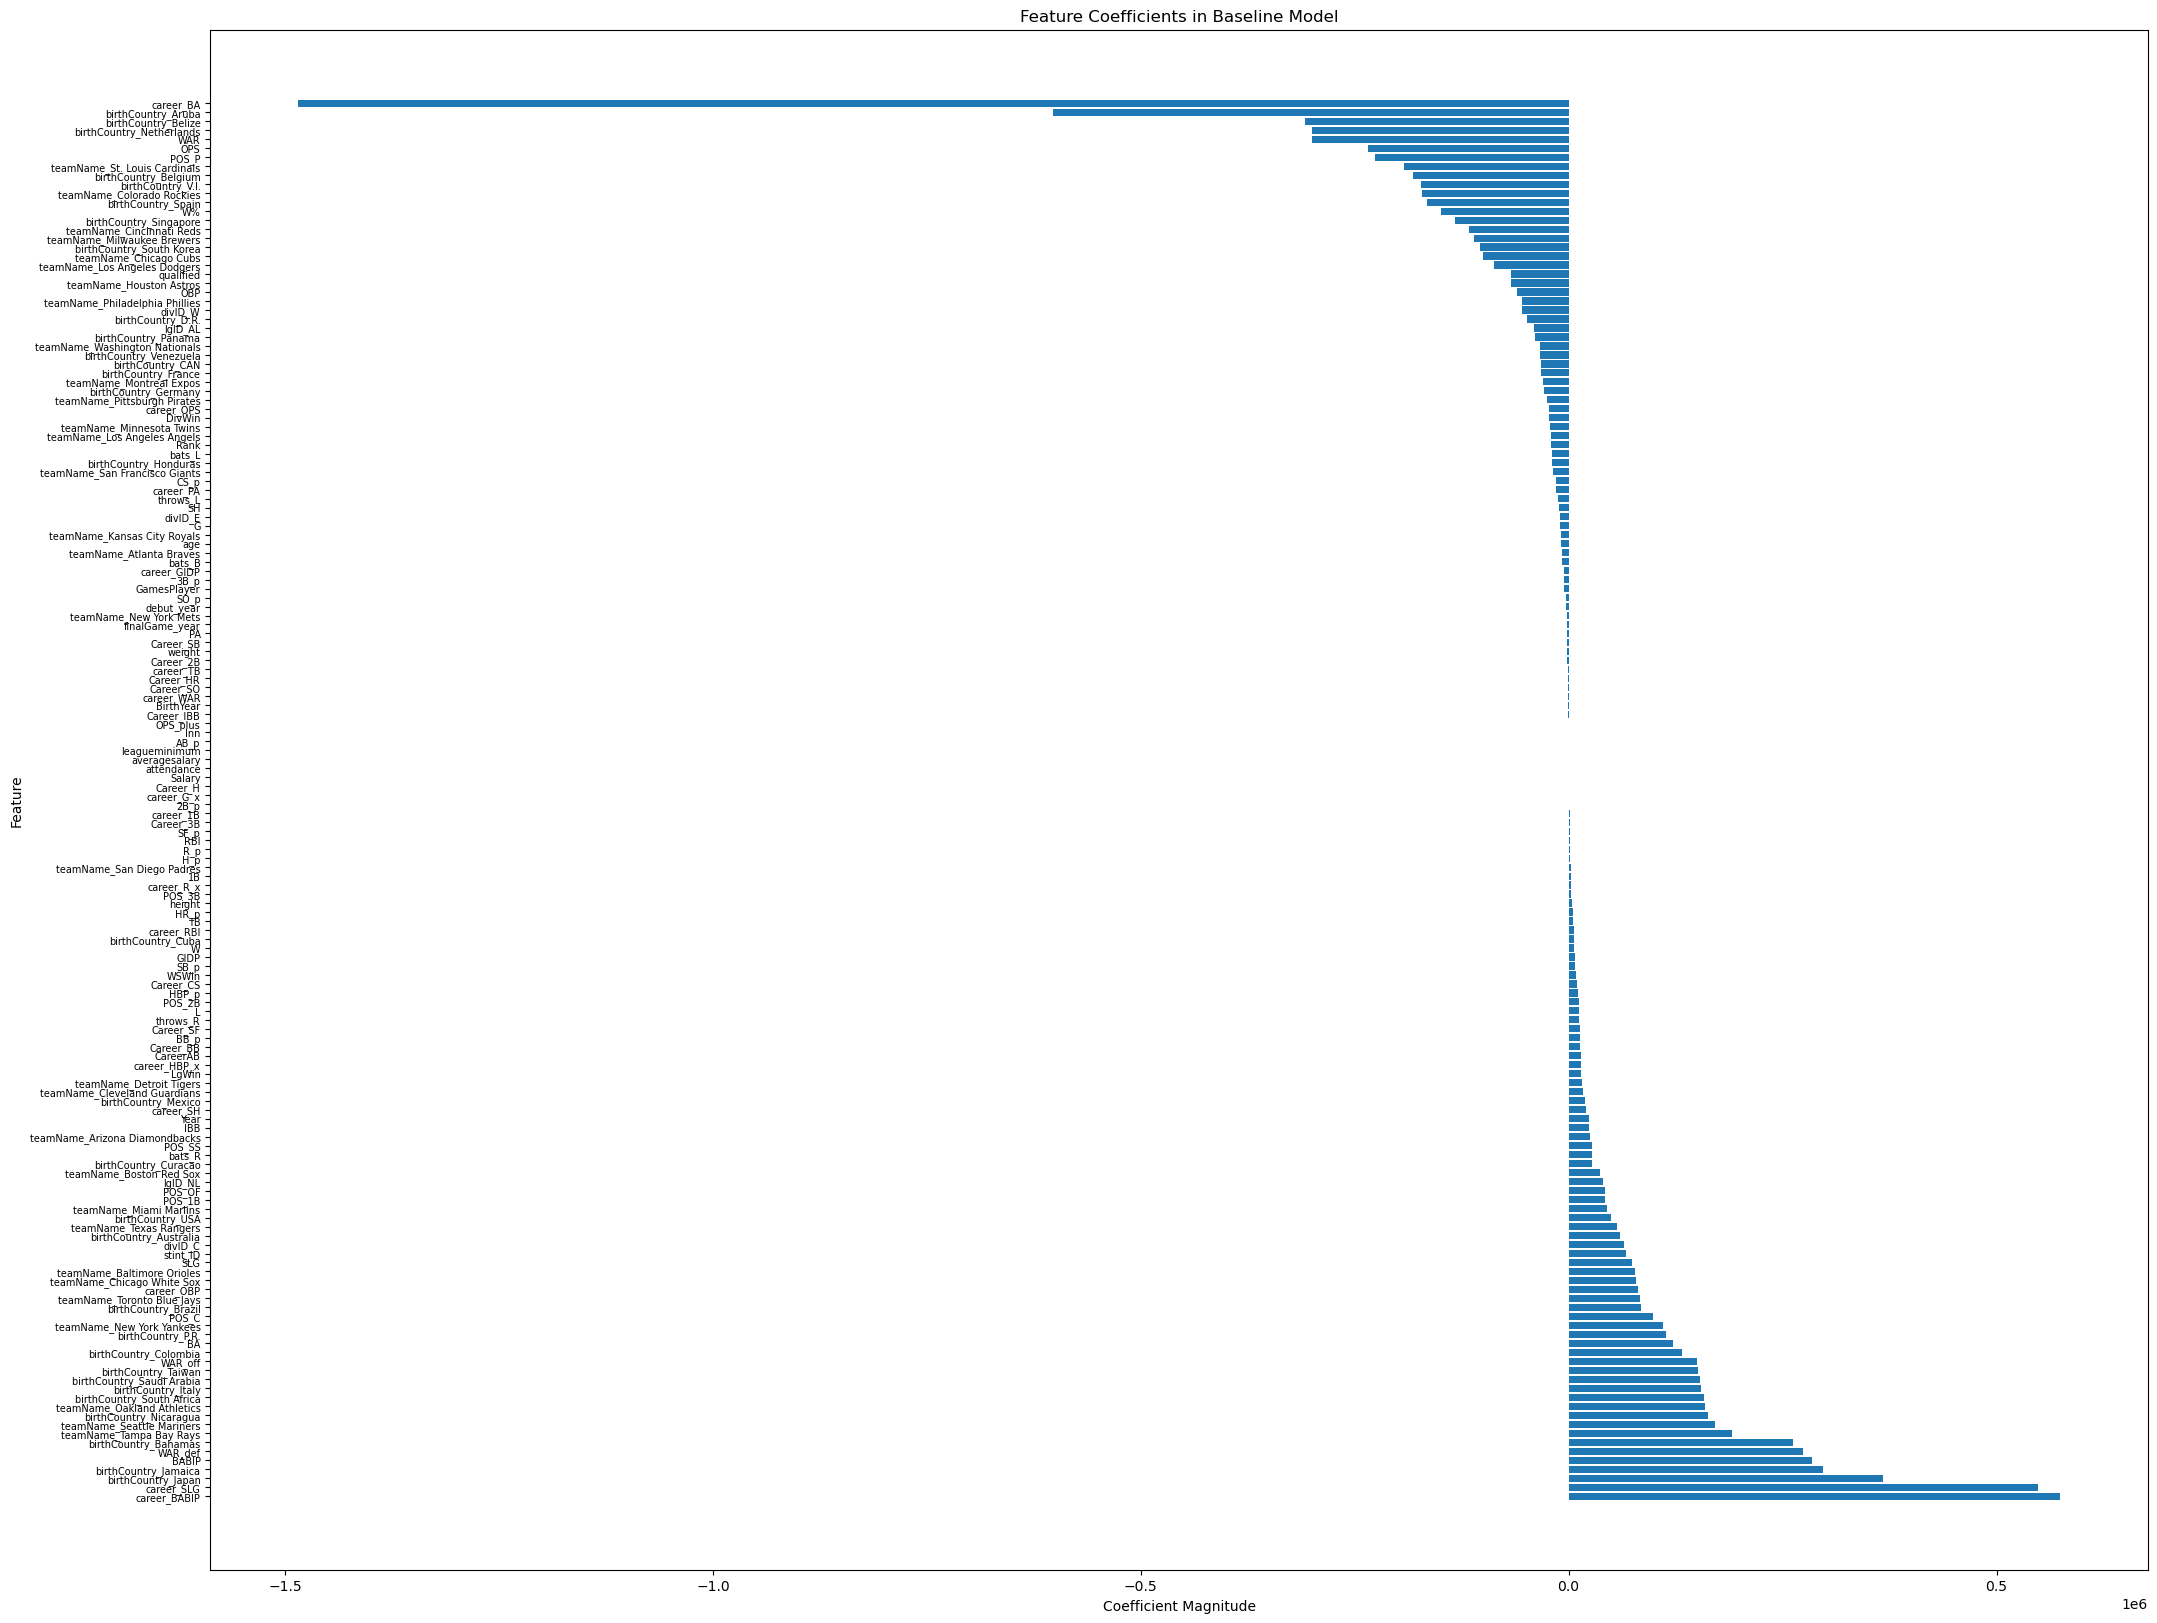

In [90]:
# Plot coefficients
plt.figure(figsize=(25, 20))
# Change feature font size
plt.barh(coefficients["Feature"], coefficients["Coefficients"])
plt.yticks(fontsize=7)
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Feature Coefficients in Baseline Model")
plt.show()


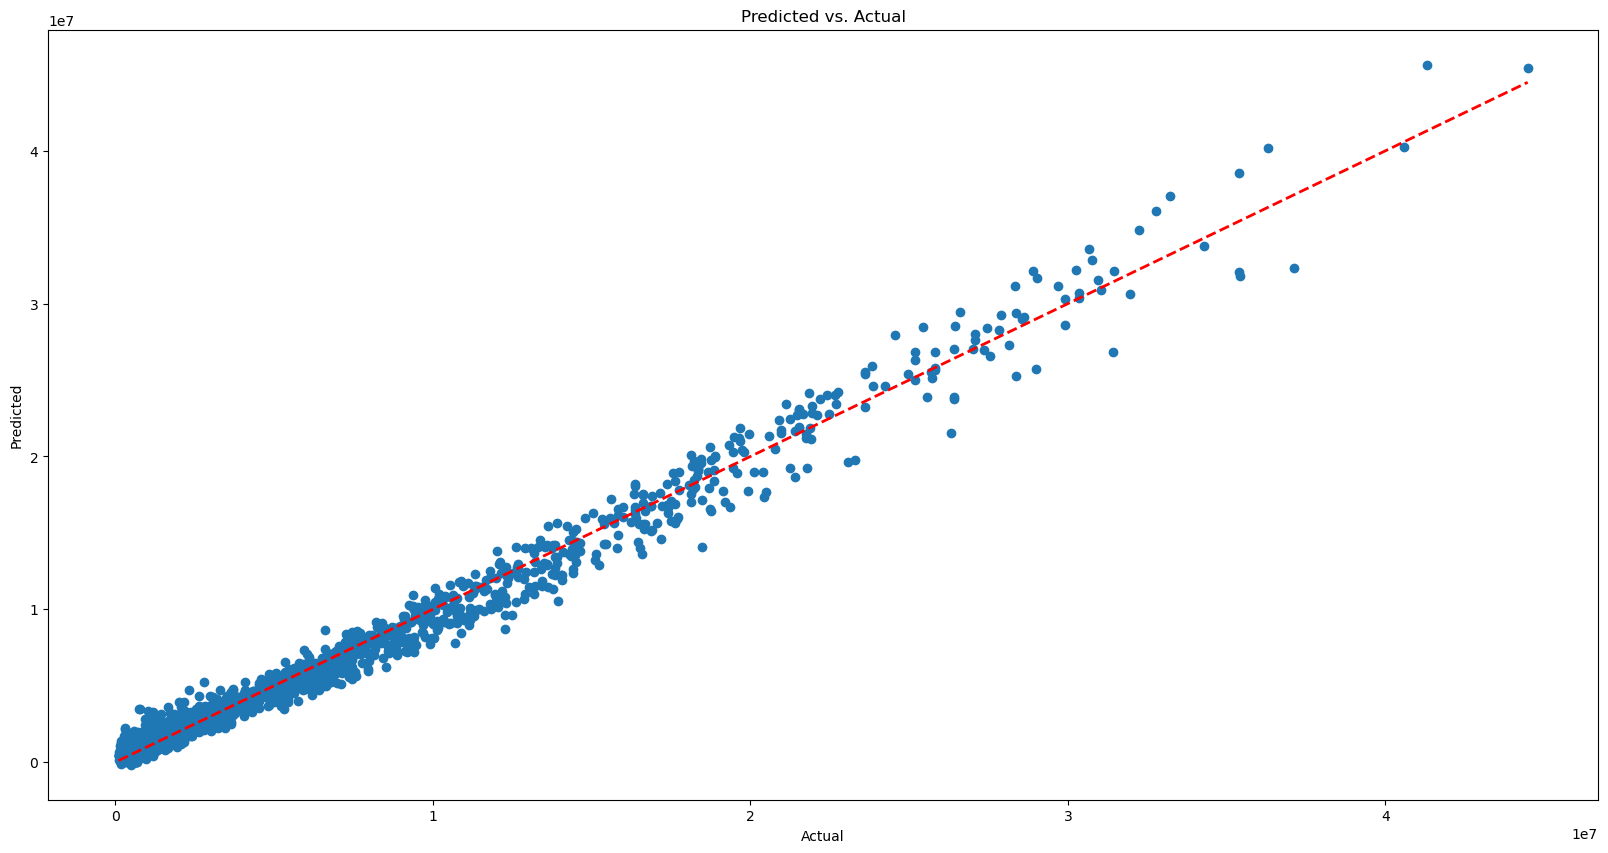

In [91]:
# Predicted vs. Actual
plt.figure(figsize=(20, 10))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual")
plt.show()

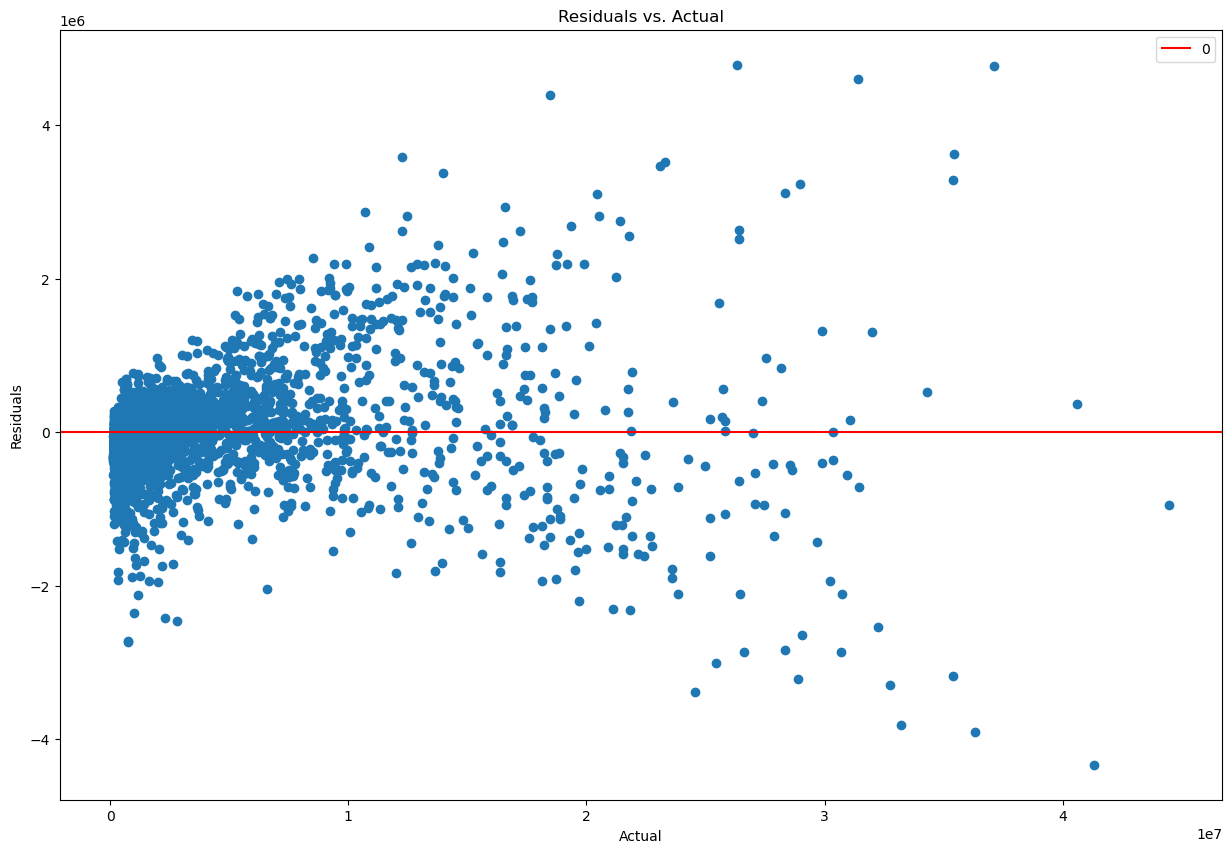

In [92]:
# Check residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(15, 10))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', label="0")
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actual")
plt.legend()
plt.show()